Python implementation of a radial basis function network. The basis functions are (unnormalized) gaussians, the output layer is linear and the weights are learned by a simple pseudo-inverse. http://www.rueckstiess.net/research/snippets/show/72d2363e

In [4]:
## Importando pacotes necessários
import numpy as np
import pandas as pd

import os
import random
from prettytable import PrettyTable
from sklearn.preprocessing import scale

ImportError: cannot import name 'datasets'

In [ ]:
## Olhando o banco de dados
data = pd.read_csv('semeion.csv', delimiter = " ", header = None)
print(data.iloc[:, -11:-1])


In [2]:
# Particionando as covariáveis
#X = data.drop(data.columns[[-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]],axis = 1)
#X.head()

In [3]:
X = data.iloc[:,0:256]
X.head()

NameError: name 'data' is not defined

In [27]:
## Particionando a resposta
#Y = data.drop(data.columns [[range(0,256)]], axis= 1)
#Y = Y.drop(Y.columns [[-1]], axis= 1)
#Y.head()

In [28]:
Y = data.iloc[:, -11:-1]
Y.head()

,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [5]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt

In [14]:
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        print("center", self.centers) 
        # calculate activations of RBFs
        G = self._calcAct(X)
        print(G) 
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
 
      
#if __name__ == '__main__':

center [array([0.8989899]), array([-0.81818182]), array([-0.19191919]), array([-0.45454545]), array([-0.33333333]), array([-0.8989899]), array([0.85858586]), array([-0.51515152]), array([0.15151515]), array([0.83838384])]
[[2.95738407e-13 7.67618196e-01 5.38597601e-03 9.25352812e-02
  2.85655008e-02 9.21618123e-01 9.96296840e-13 1.52494854e-01
  2.47200191e-05 1.81082043e-12]
 [5.44585659e-13 8.11429096e-01 6.97080982e-03 1.10016852e-01
  3.53190672e-02 9.49101466e-01 1.81082043e-12 1.77786712e-01
  3.57501816e-05 3.26983696e-12]
 [9.96296840e-13 8.52157700e-01 8.96326288e-03 1.29949664e-01
  4.33851086e-02 9.71042777e-01 3.26983696e-12 2.05924246e-01
  5.13655312e-05 5.86598424e-12]
 [1.81082043e-12 8.89105812e-01 1.14502011e-02 1.52494854e-01
  5.29463752e-02 9.87025018e-01 5.86598424e-12 2.36962572e-01
  7.33211715e-05 1.04548972e-11]
 [3.26983696e-12 9.21618123e-01 1.45319594e-02 1.77786712e-01
  6.41942099e-02 9.96740351e-01 1.04548972e-11 2.70904428e-01
  1.03980305e-04 1.8512399

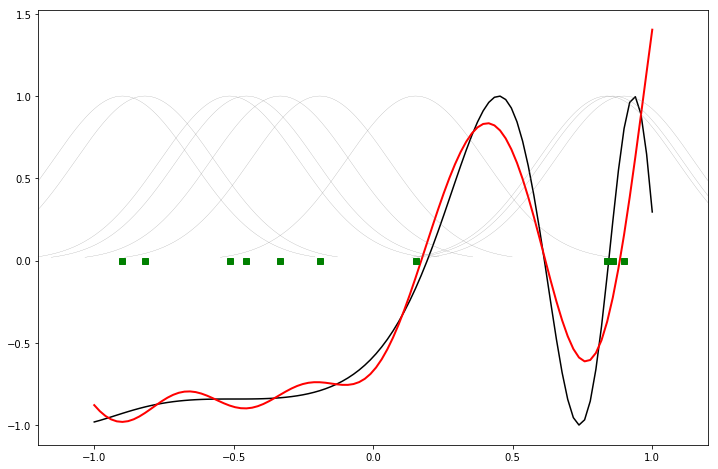

In [31]:
n = 100
#numCenters=1
x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    # set y and add random noise
y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
rbf = RBF(1, 10, 1)
rbf.train(x, y)
z = rbf.test(x)
       
    # plot original data
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'k-')
     
    # plot learned model
plt.plot(x, z, 'r-', linewidth=2)
     
    # plot rbfs
plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
for c in rbf.centers:
        # RF prediction lines
    cx = arange(c-0.7, c+0.7, 0.01)
    cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
    plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(-1.2, 1.2)
plt.show()

In [26]:
#n = 100
#numCenters=1
#x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    # set y and add random noise
#y = sin(3*(x+0.5)**3 - 1)
    # y += random.normal(0, 0.1, y.shape)
     
    # rbf regression
rbf = RBF(1, 10, 1)
rbf.train(X, Y)
z = rbf.test(X)
       
    # plot original data
plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'k-')
     
    # plot learned model
plt.plot(X, z, 'r-', linewidth=2)
     
    # plot rbfs
plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
for c in rbf.centers:
        # RF prediction lines
    cx = arange(c-0.7, c+0.7, 0.01)
    cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
    plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(-1.2, 1.2)
plt.show()

TypeError: unhashable type: 'slice'